# Laboratory exercise 6

The notebook contains exercises connected to auditory exercise 7. For any questions feel free to contact assistant: eda.jovicic@fer.hr

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
df = pd.read_csv("students_score_cleaned.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,3,2,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
29113,4,2,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
29114,2,2,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0
29115,3,0,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0


2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [3]:
def grade(score):
    if score >= 88:
        return 5
    elif score >= 75:
        return 4
    elif score >= 63:
        return 3
    elif score >= 50:
        return 2
    else:
        return 1

df["MathScore"] = df["MathScore"].apply(grade)
df

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,3,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,3,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,4,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,1,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,4,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,3,2,1,2,2,0,2.0,1,0,2,61,65,1.0,0.0,0.0,1.0
29113,4,2,1,2,1,0,1.0,0,0,2,53,51,0.0,1.0,0.0,1.0
29114,2,2,0,1,2,0,1.0,0,0,2,70,67,1.0,0.0,1.0,0.0
29115,3,0,0,1,1,0,3.0,1,0,4,90,93,1.0,0.0,0.0,1.0


3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [4]:
X = df.drop(columns=["MathScore", "ReadingScore", "WritingScore"])
y = df[["MathScore"]]
y


,MathScore
0,3
1,3
2,4
3,1
4,4
...,...
29112,2
29113,2
29114,2
29115,4


In [5]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train

,MathScore
1899,3
2703,4
21768,4
5055,3
22220,2
...,...
24031,3
10258,3
26635,1
5438,2


4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

C:\Users\Ana\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


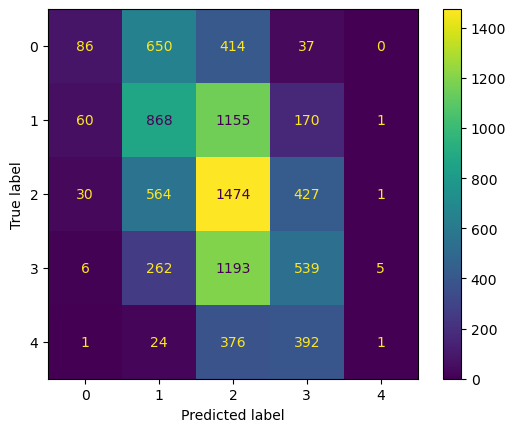

              precision    recall  f1-score   support

           1       0.47      0.07      0.13      1187
           2       0.37      0.39      0.38      2254
           3       0.32      0.59      0.41      2496
           4       0.34      0.27      0.30      2005
           5       0.12      0.00      0.00       794

    accuracy                           0.34      8736
   macro avg       0.33      0.26      0.24      8736
weighted avg       0.34      0.34      0.30      8736



In [6]:
#Random Forest model
#train
model = RandomForestClassifier(n_estimators=20, max_depth=5)
model.fit(X_train, y_train)

#test
y_pred = model.predict(X_test)

#show results
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [7]:
#transform grades into failed (0) or passed (1)
df["MathScore"] = df["MathScore"].apply(lambda x: 0 if x < 2 else 1)

C:\Users\Ana\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


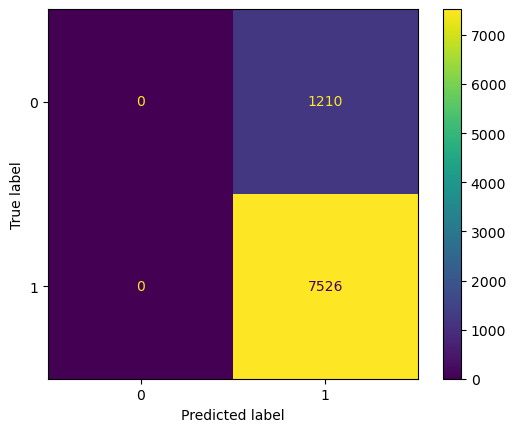

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1210
           1       0.86      1.00      0.93      7526

    accuracy                           0.86      8736
   macro avg       0.43      0.50      0.46      8736
weighted avg       0.74      0.86      0.80      8736



C:\Users\Ana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
X = df.drop(columns=["MathScore", "ReadingScore", "WritingScore"])
y = df[["MathScore"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Random Forest model
#train
model = RandomForestClassifier(n_estimators=20, max_depth=5)
model.fit(X_train, y_train)

#test
y_pred = model.predict(X_test)

#show results
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.

**The model has good accuracy, but the confusion matrix shows that it always predicts a pass. The problem is that the dataset is unbalanced (many more examples of "pass" than of "fail"). We could reduce the dataset to make it balnced, find more examples, or put bigger weights on the sparse examples.**